## **European Drug Development EDA**
Owner: Grace (Wen-Hsin) Kung

Team2: Angela Liou, Wen-Hsin Kung, Tzu-Chun Chen

[[Data Source](http://github.com/rfordatascience/tidytuesday/tree/main/data/2023/2023-03-14)]

In [1]:
# Import .csv data
import pandas as pd
data = pd.read_csv('drugs.csv')
data.head()

,category,medicine_name,therapeutic_area,common_name,active_substance,product_number,patient_safety,authorisation_status,atc_code,additional_monitoring,...,marketing_authorisation_holder_company_name,pharmacotherapeutic_group,date_of_opinion,decision_date,revision_number,condition_indication,species,first_published,revision_date,url
0,human,Adcetris,"Lymphoma, Non-Hodgkin; Hodgkin Disease",brentuximab vedotin,brentuximab vedotin,2455,False,authorised,L01XC12,False,...,Takeda Pharma A/S,Antineoplastic agents,2012-07-19,2022-11-17,34.0,Hodgkin lymphomaAdcetris is indicated for adul...,NaN,2018-07-25T13:58:00Z,2023-03-13T11:52:00Z,https://www.ema.europa.eu/en/medicines/human/E...
1,human,Nityr,Tyrosinemias,nitisinone,nitisinone,4582,False,authorised,A16AX04,False,...,Cycle Pharmaceuticals (Europe) Ltd,"Other alimentary tract and metabolism products,",2018-05-31,2023-03-10,4.0,Treatment of adult and paediatric patients wit...,NaN,2018-07-26T14:20:00Z,2023-03-10T17:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
2,human,Ebvallo,Lymphoproliferative Disorders,tabelecleucel,tabelecleucel,4577,False,authorised,NaN,True,...,Pierre Fabre Medicament,NaN,2022-10-13,2023-03-09,2.0,Ebvallo is indicated as monotherapy for treatm...,NaN,2022-10-12T16:13:00Z,2023-03-10T13:40:00Z,https://www.ema.europa.eu/en/medicines/human/E...
3,human,Ronapreve,COVID-19 virus infection,"casirivimab, imdevimab","casirivimab, imdevimab",5814,False,authorised,J06BD,True,...,Roche Registration GmbH,"Immune sera and immunoglobulins,",2021-11-11,2023-02-24,3.0,Ronapreve is indicated for:Treatment of COVID-...,NaN,2021-11-12T16:30:00Z,2023-03-10T12:29:00Z,https://www.ema.europa.eu/en/medicines/human/E...
4,human,Cosentyx,"Arthritis, Psoriatic; Psoriasis; Spondylitis...",secukinumab,secukinumab,3729,False,authorised,L04AC10,False,...,Novartis Europharm Limited,Immunosuppressants,2014-11-20,2023-01-26,30.0,Plaque psoriasisCosentyx is indicated for the ...,NaN,2018-06-07T11:59:00Z,2023-03-09T18:53:00Z,https://www.ema.europa.eu/en/medicines/human/E...


In [48]:
# Data overview
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   category                                     1988 non-null   object        
 1   medicine_name                                1988 non-null   object        
 2   therapeutic_area                             1703 non-null   object        
 3   common_name                                  1984 non-null   object        
 4   active_substance                             1987 non-null   object        
 5   product_number                               1988 non-null   int64         
 6   patient_safety                               1988 non-null   bool          
 7   authorisation_status                         1987 non-null   object        
 8   atc_code                                     1960 non-null   object        
 9

In [3]:
print(data.nunique())

category                                          2
medicine_name                                  1976
therapeutic_area                                669
common_name                                    1261
active_substance                               1345
product_number                                 1932
patient_safety                                    2
authorisation_status                              3
atc_code                                       1074
additional_monitoring                             2
generic                                           2
biosimilar                                        2
conditional_approval                              2
exceptional_circumstances                         2
accelerated_assessment                            2
orphan_medicine                                   2
marketing_authorisation_date                   1127
date_of_refusal_of_marketing_authorisation       67
marketing_authorisation_holder_company_name     615
pharmacother

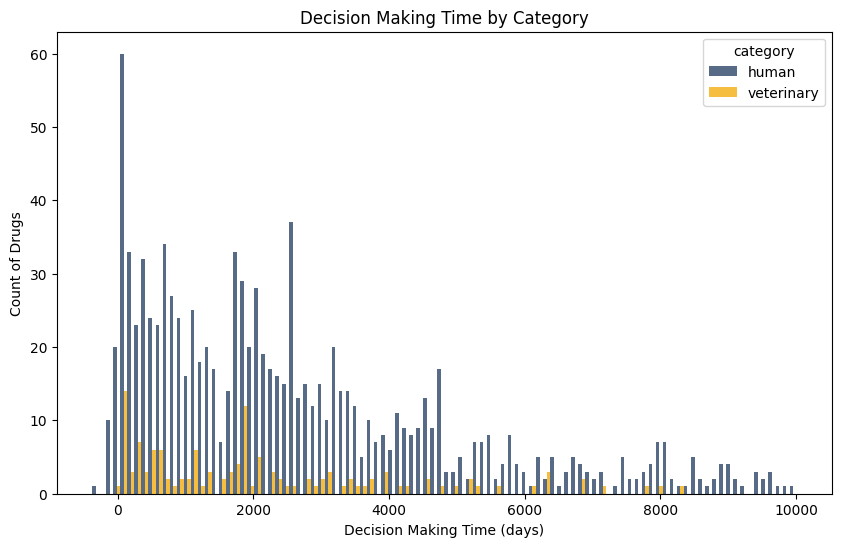

In [70]:
# Calculate decision_making_time in days
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dates to datetime
data['date_of_opinion'] = pd.to_datetime(data['date_of_opinion'], errors='coerce')
data['decision_date'] = pd.to_datetime(data['decision_date'], errors='coerce')

# Calculate time difference in days
data['decision_making_time'] = (data['decision_date'] - data['date_of_opinion']).dt.days

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='decision_making_time', hue='category', bins=100, palette={'human': '#1f3a5f', 'veterinary': '#f2a900'}, multiple='dodge', edgecolor='none')
plt.title('Decision Making Time by Category')
plt.xlabel('Decision Making Time (days)')
plt.ylabel('Count of Drugs')
plt.show()

**Insights:**
For both human and veterinary drug, there are 2 potential clusters, which are around 0-1500 days and around 1700+ days.

For the shorter-duration cluster, the decisions were likely made without waiting for full clinical maturity. For instance, they might be refused / withdrawn cases, or cases taking non-standard pathways (e.g., accelerated, conditional approved, exceptional, orphan-related).

As for the longer duration, they included clinical 3 phases, full EMA assessment, and the whole process typically takes up to 10+ years.

**Inspired Question:**
Do medicines that fall into different decision-time clusters exhibit systematically distinct regulatory and development profiles? What do these differences reveal about underlying regulatory pathways in Europe?

If the time-based clusters show no significant difference on orphan / accelerated / conditional / exceptional, then decision-time clustering may not driven by regulatory pathway, instead, it may be driven by dataset itself or external factors.

Referece: https://www.spgl.eu/an-overview-of-the-journey-from-drug-development-to-approval/

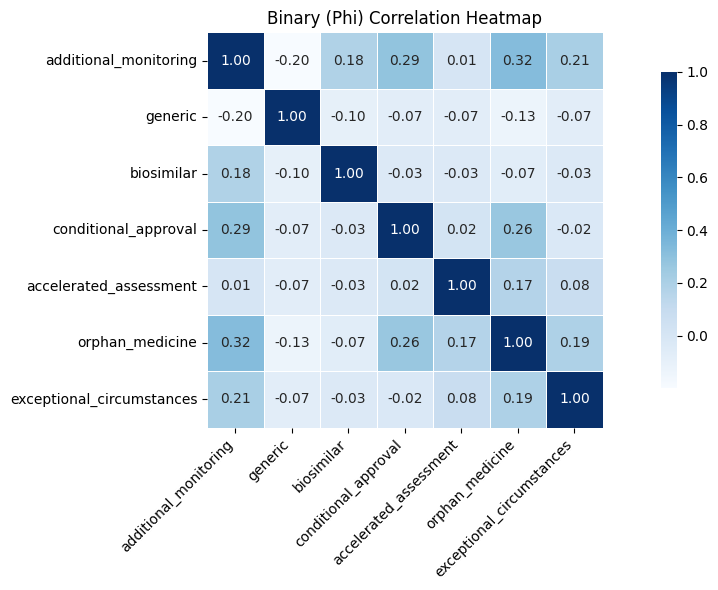

In [28]:
# Binary variables correlation heatmap
import numpy as np
from scipy.stats import chi2_contingency

binary_vars = ['additional_monitoring','generic','biosimilar','conditional_approval', 'accelerated_assessment', 'orphan_medicine', 'exceptional_circumstances']
data_binary = data[binary_vars].apply(pd.to_numeric, errors='coerce').dropna()

# Phi correlation matrix
phi_corr = data_binary.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(phi_corr, annot=True, fmt='.2f', cmap='Blues', square=True,
            cbar_kws={'shrink': 0.8}, linewidths=0.5)
plt.title('Binary (Phi) Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insights:**
addtional_monitoring seems to be corelated with other regulatory features.

**Inspired Question:**
Does additional monitoring act as a central regulatory feature around which other special designations (e.g., orphan status, conditional approval, exceptional circumstances) tend to co-occur, forming a distinct subgroup of medicines?

If there is no tendancy of co-occurance, we would be surprised because additional monitor is supposed to be a means to make sure regulated drugs are used in a safe way.

In [71]:
# Top 50 active substances
df_unique_medicine = (
    data[['medicine_name', 'active_substance']]
    .dropna(subset=['medicine_name', 'active_substance'])
    .drop_duplicates(subset=['medicine_name'])
)

top_50_active_substances = (
    df_unique_medicine['active_substance']
    .value_counts()
    .head(50)
)

print(top_50_active_substances)

active_substance
meloxicam                                    18
adalimumab                                   16
bevacizumab                                  12
insulin human                                12
olanzapine                                   12
pegfilgrastim                                12
pregabalin                                   10
pioglitazone hydrochloride                   10
telmisartan                                   9
desloratadine                                 9
levetiracetam                                 9
filgrastim                                    9
clopidogrel                                   9
rituximab                                     8
docetaxel                                     8
rivastigmine                                  8
ibandronic acid                               8
memantine hydrochloride                       8
teriparatide                                  8
clopidogrel (as hydrochloride)                8
trastuzumab            

**Insights:**
Among top active substances, meloxicam and olanzapine are mature generic drug, adalimumab, bevacizumab, and pegfilgrastim are biosimilar drug that compete with each other. Insulin human is a stable drug for diabete. This pattern suggests that repeated appearances and regulatory intensity are shaped by therapeutic area rather than by unique characteristics of individual medicines.

**Inspired Question:**
Are medicines more similar to each other in regulatory profile when they share the same active substance or when they belong to the same therapeutic domain?

If drugs sharing the same active substance are not in the same cluster, while medicines within the same therapeutic domain exhibit high similarity, this would indicate the dominant role of therapeutic domain over molecular identity.

In [32]:
# Top 20 marketing authorisation holder company names
top_20_companies = data['marketing_authorisation_holder_company_name'].value_counts().head(20)
print(top_20_companies)

marketing_authorisation_holder_company_name
Novartis Europharm Limited                 58
Accord Healthcare S.L.U.                   58
Pfizer Europe MA EEIG                      43
Zoetis Belgium SA                          40
AstraZeneca AB                             36
Boehringer Ingelheim Vetmedica GmbH        36
Merck Sharp & Dohme B.V.                   32
Teva B.V.                                  32
Intervet International BV                  31
Eli Lilly Nederland B.V.                   30
Novo Nordisk A/S                           28
Mylan Pharmaceuticals Limited              26
Bristol-Myers Squibb Pharma EEIG           26
Roche Registration GmbH                    26
Janssen-Cilag International NV             23
Boehringer Ingelheim International GmbH    22
Gilead Sciences Ireland UC                 21
Sanofi Winthrop Industrie                  19
Sandoz GmbH                                18
GlaxoSmithKline Biologicals S.A.           18
Name: count, dtype: int64


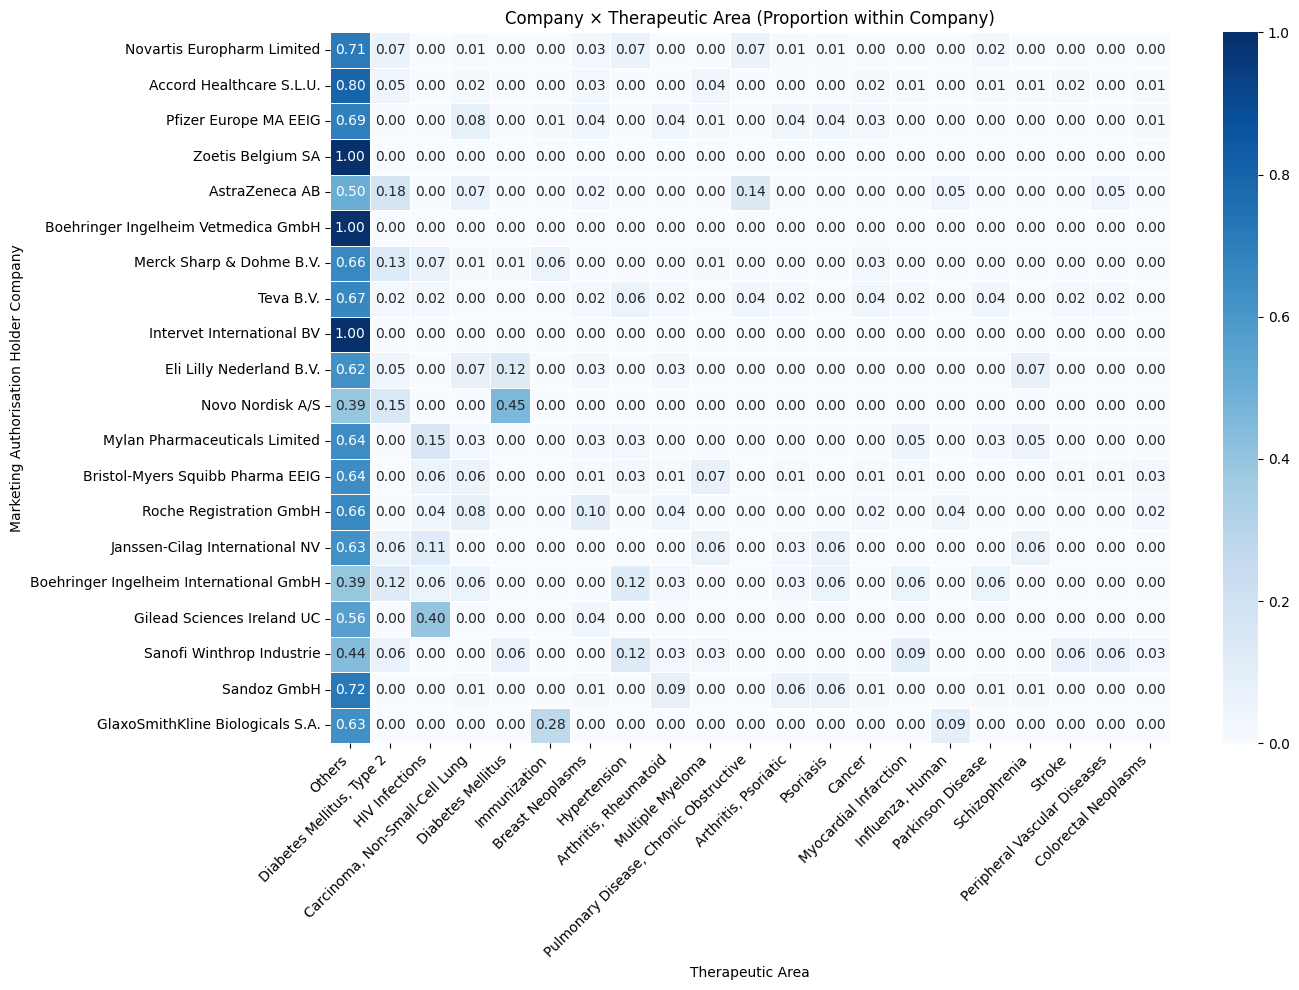

In [75]:
# Companies vs Therapeutic Areas Heatmap
# Top 20 companies
top_20_companies = data['marketing_authorisation_holder_company_name'].value_counts().head(20).index.tolist()

# Clean therapeutic_area
exploded_areas = data['therapeutic_area'].str.split(';').explode().str.strip()
top_20_areas = exploded_areas.value_counts().head(20).index.tolist()
exploded_areas = exploded_areas.apply(lambda x: x if x in top_20_areas else 'Others')

# Create analysis dataframe
analysis_df = data.copy().loc[exploded_areas.index]
analysis_df['therapeutic_area_clean'] = exploded_areas.values
analysis_df = analysis_df[analysis_df['marketing_authorisation_holder_company_name'].isin(top_20_companies)]

# Function to create heatmap for a category
heatmap_counts = (
    analysis_df
    .groupby(['marketing_authorisation_holder_company_name', 'therapeutic_area_clean'])
    .size()
    .unstack(fill_value=0)
)

area_order = (
    analysis_df['therapeutic_area_clean']
    .value_counts()
    .index
    .tolist()
)
heatmap_counts = heatmap_counts.reindex(columns=area_order, fill_value=0)
heatmap_counts = heatmap_counts.reindex(index=top_20_companies)

heatmap_prop = heatmap_counts.div(heatmap_counts.sum(axis=1).replace(0, pd.NA), axis=0).fillna(0)

# plot
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    heatmap_prop,
    cmap='Blues',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    linecolor='white'
)

plt.title('Company × Therapeutic Area (Proportion within Company)')
plt.xlabel('Therapeutic Area')
plt.ylabel('Marketing Authorisation Holder Company')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insights:**
Some primary companies focus on primary therapeutic area. For instance, Novo Nordisk A/S focuses onDiabetes Mellitus, Gilead Science Ireland UC focuses on HIV Infections, and AZ focuses on Diabetes and pulmonary disease. In contrast, companies like Boehringer Ingelheim Vetmedica GmbH and Sanofi distribute R&D resources to various areas.

In [41]:
# Check for drugs where both generic=1 and biosimilar=1
both = data[(data['generic'] == 1) & (data['biosimilar'] == 1)]
print(f"Number of drugs where both generic=1 and biosimilar=1: {len(both)}")
if len(both) > 0:
    print("Examples:")
    print(both[['medicine_name', 'active_substance', 'marketing_authorisation_holder_company_name']].head())
else:
    print("No such drugs found.")

Number of drugs where both generic=1 and biosimilar=1: 0
No such drugs found.


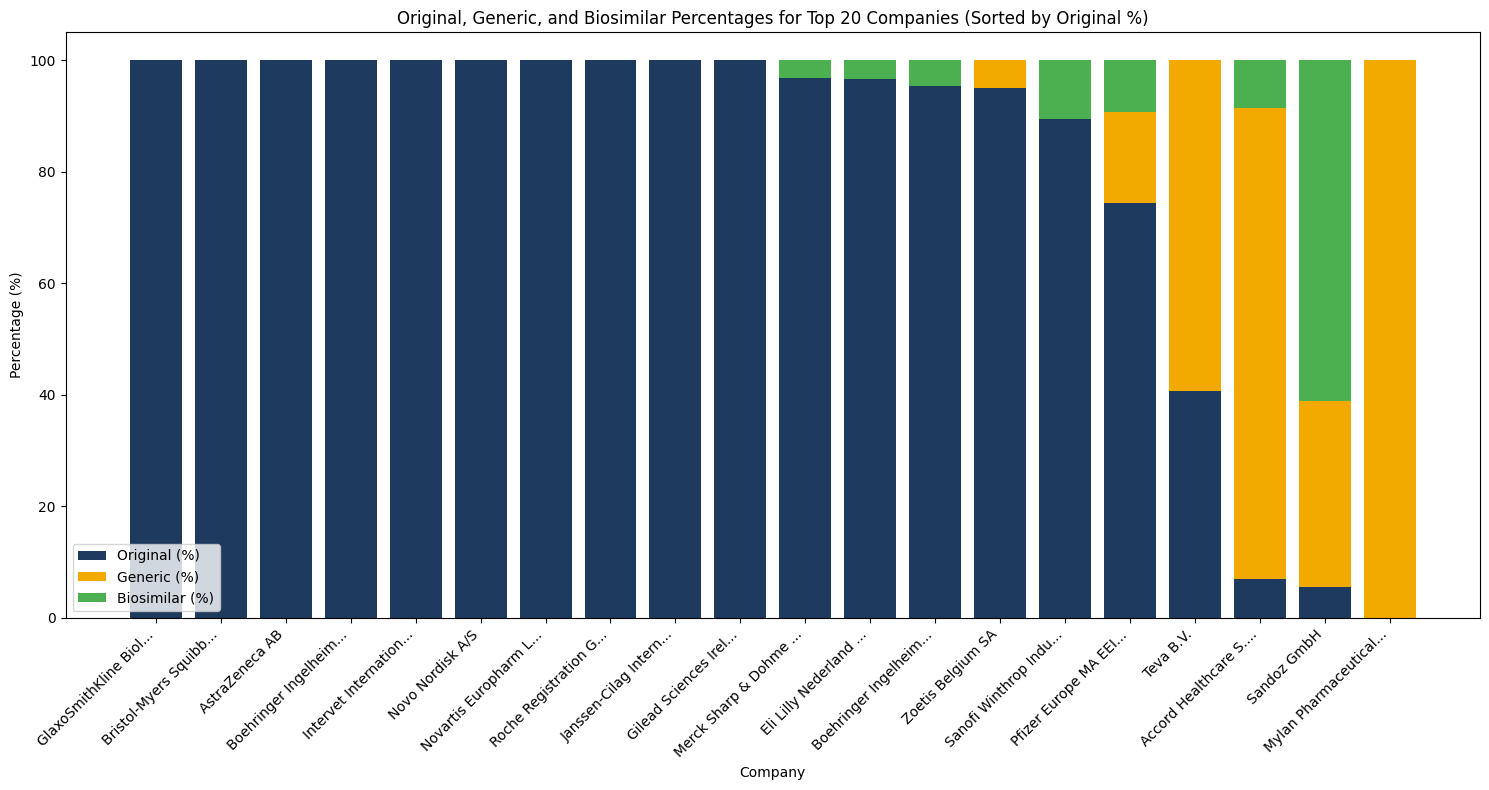

In [40]:
# Top 20 companies
top_20_companies = data['marketing_authorisation_holder_company_name'].value_counts().head(20).index.tolist()

# Calculate percentages
original_percent = []
generic_percent = []
biosimilar_percent = []
companies_list = []
for company in top_20_companies:
    company_data = data[data['marketing_authorisation_holder_company_name'] == company]
    total = len(company_data)
    if total > 0:
        orig_pct = ((company_data['generic'] == 0) & (company_data['biosimilar'] == 0)).sum() / total * 100
        gen_pct = (company_data['generic'] == 1).sum() / total * 100
        bio_pct = (company_data['biosimilar'] == 1).sum() / total * 100
    else:
        orig_pct = 0
        gen_pct = 0
        bio_pct = 0
    original_percent.append(orig_pct)
    generic_percent.append(gen_pct)
    biosimilar_percent.append(bio_pct)
    companies_list.append(company)

# Sort by descending original percentage
sorted_indices = np.argsort(original_percent)[::-1]
original_percent = [original_percent[i] for i in sorted_indices]
generic_percent = [generic_percent[i] for i in sorted_indices]
biosimilar_percent = [biosimilar_percent[i] for i in sorted_indices]
companies_sorted = [companies_list[i] for i in sorted_indices]

# Plot stacked bar chart
x = np.arange(len(companies_sorted))

fig, ax = plt.subplots(figsize=(15, 8))
bars1 = ax.bar(x, original_percent, label='Original (%)', color='#1f3a5f')
bars2 = ax.bar(x, generic_percent, bottom=original_percent, label='Generic (%)', color='#f2a900')
bars3 = ax.bar(x, biosimilar_percent, bottom=np.array(original_percent) + np.array(generic_percent), label='Biosimilar (%)', color='#4CAF50')

ax.set_xlabel('Company')
ax.set_ylabel('Percentage (%)')
ax.set_title('Original, Generic, and Biosimilar Percentages for Top 20 Companies (Sorted by Original %)')
ax.set_xticks(x)
ax.set_xticklabels([c[:20] + '...' if len(c) > 20 else c for c in companies_sorted], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

**Insights:**
Most of top companies develop original drugs, while only 3 of them focus on generic medicines. It might be useful to analyze and compare performce (e.g., authorisation rate, profit) of companies leveraging different R&D strategies.

**Inspired Question:**
Do companies cluster primarily by shared therapeutic focus (e.g., diabetes-focused) or by development model (e.g., generic/biosimilar-heavy)?

In [45]:
# Check authorisation_status values
print("Value counts:")
print(data['authorisation_status'].value_counts())
print("\nUnique values:")
print(data['authorisation_status'].unique())

Value counts:
authorisation_status
authorised    1573
withdrawn      357
refused         57
Name: count, dtype: int64

Unique values:
['authorised' 'withdrawn' 'refused' nan]


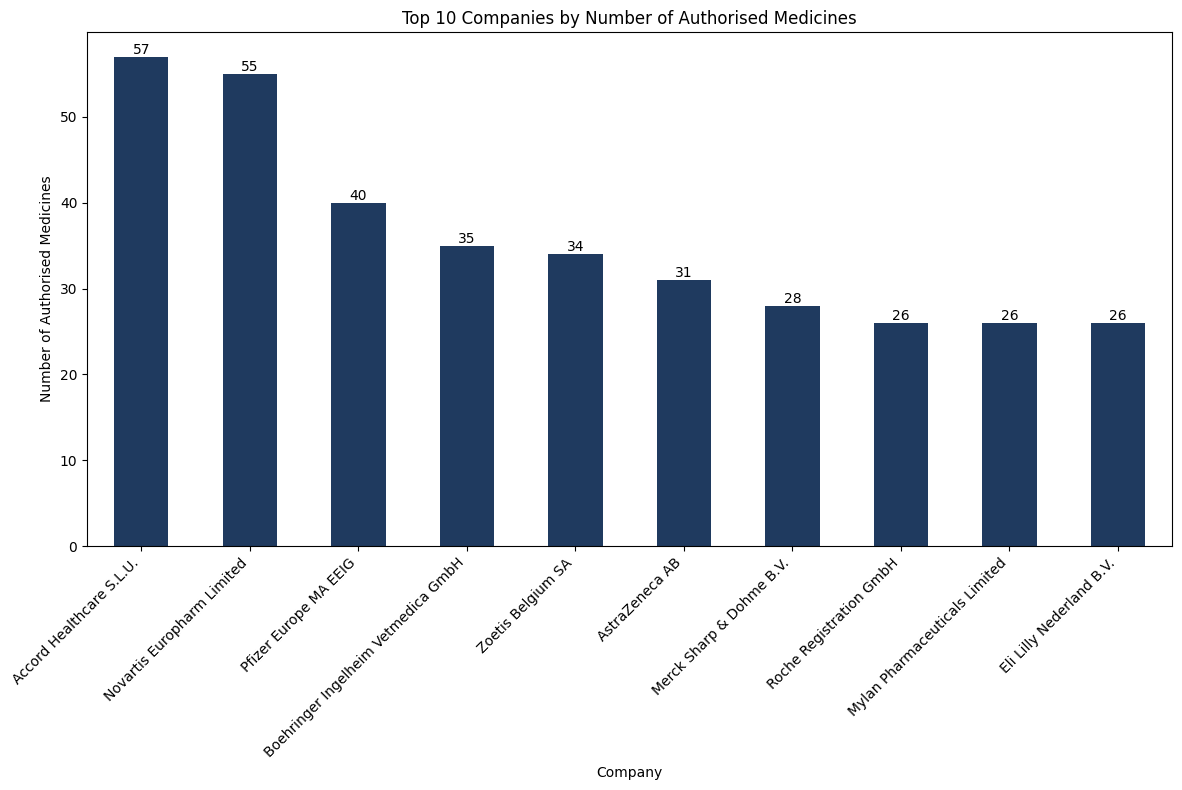

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = data.copy()
df = df[
    [
        'marketing_authorisation_holder_company_name',
        'authorisation_status',
        'product_number'
    ]
].dropna(subset=['marketing_authorisation_holder_company_name', 'authorisation_status', 'product_number'])

df_auth = df[df['authorisation_status'] == 'authorised']

# Drop duplicates
df_auth_unique = df_auth.drop_duplicates(
    subset=['marketing_authorisation_holder_company_name', 'product_number']
)

# Claculate authorisation counts
authorised_counts = (
    df_auth_unique
    .groupby('marketing_authorisation_holder_company_name')
    .size()
    .sort_values(ascending=False)
)

top_10 = authorised_counts.head(10)

# Bar Chart
plt.figure(figsize=(12, 8))
ax = top_10.plot(kind='bar', color='#1f3a5f')
plt.title('Top 10 Companies by Number of Authorised Medicines')
plt.xlabel('Company')
plt.ylabel('Number of Authorised Medicines')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

**Insights:**
Accord Healthcare S.L.U, which mainly developed generic drugs, got the most authorisation within the time range in the dataset. Novartis Europharm Limited, who 100% developed origin drugs, got the 2nd most authorisation. This may indicate that original, biosimilar, and generic features do not impact whether the medicine would be approved.

**Inspired Question:**
Do companies with different development strategies (originator-focused, generic-focused, or biosimilar-focused) achieve similar authorization outcomes through distinct regulatory pathways?

A high degree of overlap in regulatory profiles and decision-time distributions between generic- and originator-focused companies would suggest that strategic differences are of limited importance.